<a href="https://colab.research.google.com/github/SubhankarSinha1985/CNN_repo/blob/main/Cats_vs_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:53<00:00, 22.5MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.3MB/s]


In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zipref.extractall('/content')
zipref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [ ]:
# generators are very useful to process large amount of image/data
process_train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int", # it will assign cat 0 dog 1
    batch_size=32,
    image_size=(256, 256),
  )

process_validation_df = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int", # it will assign cat 0 dog 1
    batch_size=32,
    image_size=(256, 256),
  )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
"""since the images stored in a numpy array, the min number is 0 and max number is 256.
we need to bring the number between 0 to 1. Hence we need to do normalize
"""
def process(image,label):
    tf.cast(image/256, tf.float32)
    return image,label

process_train_df = process_train_df.map(process)
process_validation_df = process_validation_df.map(process)

In [ ]:
# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(process_train_df,
                    validation_data=process_validation_df, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 91ms/step - accuracy: 0.5856 - loss: 2.3321 - val_accuracy: 0.7020 - val_loss: 0.5726
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7239 - loss: 0.5535 - val_accuracy: 0.6464 - val_loss: 1.2913
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7926 - loss: 0.4399 - val_accuracy: 0.6176 - val_loss: 1.5648
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8400 - loss: 0.3575 - val_accuracy: 0.7188 - val_loss: 1.2206
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.8987 - loss: 0.2446 - val_accuracy: 0.7826 - val_loss: 0.8908


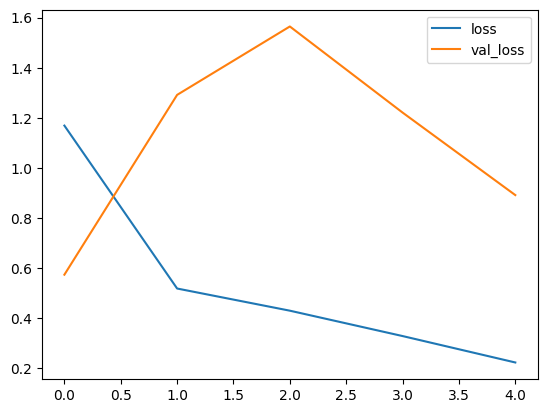

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(5), history.history['loss'], label='loss')
plt.plot(range(5), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

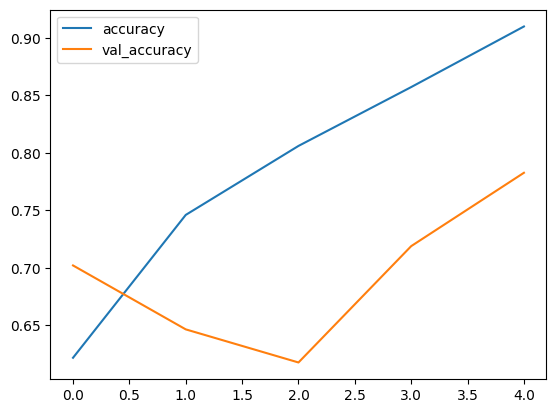

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(5), history.history['accuracy'], label='accuracy')
plt.plot(range(5), history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
! pip install keras.preprocessing.image.ImageDataGenerator


ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image.ImageDataGenerator (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image.ImageDataGenerator


In [ ]:
# IMPLEMENTING DATA AUGMENTATION
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.utils import image_dataset_from_directory


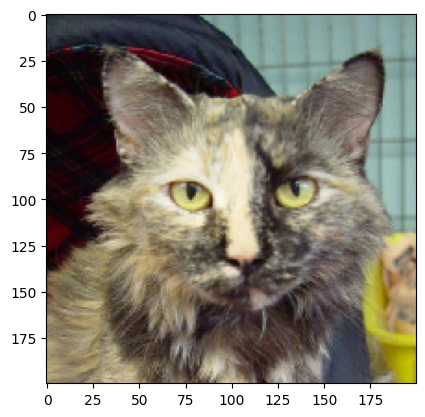

In [ ]:
img = image.load_img('/content/sample_data/cat.10.jpg', target_size=(200,200))
import matplotlib.pyplot as plt
plt.imshow(img)


In [ ]:
type(img)
import numpy as np
img = np.array(img)
type(img)
img.shape

(200, 200, 3)

In [ ]:
!pip install imgaug


In [ ]:
import imgaug.augmenters as iaa
import cv2
import os

# Augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip 50% of images horizontally
    iaa.Affine(rotate=(-45, 45)),  # Rotate images
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Add Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Change brightness
    iaa.Crop(percent=(0, 0.1))  # Crop images
])

# Load image
image_path = '/content/sample_data/cat.10.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply augmentations
augmented_image = []
for i in range(1000):
    augmented_image.append(augmentation_pipeline(image=image_rgb))

# Convert RGB back to BGR for saving
augmented_image_bgr = []
for i in range(1000):
    augmented_image_bgr.append(cv2.cvtColor(augmented_image[i], cv2.COLOR_RGB2BGR))

# Create output folder if it doesn't exist
output_folder = '/content/sample_data/augmented_image'
os.makedirs(output_folder, exist_ok=True)

# Save the augmented image
for i in range(1000):
    output_path = os.path.join(output_folder, 'augmented_image'+str(i)+'.jpg')
    cv2.imwrite(output_path, augmented_image_bgr[i])

print(f"Augmented image saved at {output_path}")

Augmented image saved at /content/sample_data/augmented_image/augmented_image999.jpg


In [ ]:
type(augmented_image)
augmented_image.shape

(499, 489, 3)

In [ ]:
# Augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip 50% of images horizontally
    iaa.Affine(rotate=(-45, 45)),  # Rotate images
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Add Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Change brightness
    iaa.Crop(percent=(0, 0.1))  # Crop images
])

# Load image
image_path = '/content/train/cats'
# Create output folder if it doesn't exist
output_folder = '/content/train/cats/augmented_image'
os.makedirs(output_folder, exist_ok=True)

for image in os.listdir(image_path):
    image_name = cv2.imread(image_path+'/'+image)
# Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_name, cv2.COLOR_BGR2RGB)

# Apply augmentations
    augmented_image = []
    for i in range(5):
        augmented_image.append(augmentation_pipeline(image=image_rgb))

# Convert RGB back to BGR for saving
    augmented_image_bgr = []
    for j in range(5):
        augmented_image_bgr.append(cv2.cvtColor(augmented_image[j], cv2.COLOR_RGB2BGR))



# Save the augmented image
    for i in range(5):
        output_path = os.path.join(output_folder, 'augmented_image'+str(i)+'.jpg')
        cv2.imwrite(output_path, augmented_image_bgr[i])

print(f"Augmented image saved at {output_path}")

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
